In [1]:
import torch
import numpy as np
import torch.optim as optim
import torch.nn.functional as f
from Models import loadData, CNN_Classifier, PCA_Transformation

# PCA Based Classification

## Importing Data

In [2]:
X_train, y_train = loadData('train', toType='ndarray')
X_test, y_test = loadData('test', toType='ndarray')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1649, 224, 224) (1649,)
(500, 224, 224) (500,)


## Reshaping Data

In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

print(X_train.shape, X_test.shape)

(1649, 50176) (500, 50176)


In [4]:
X = np.concatenate((X_train, X_test), axis=0)

print(X.shape)

(2149, 50176)


## Analysis with PCA

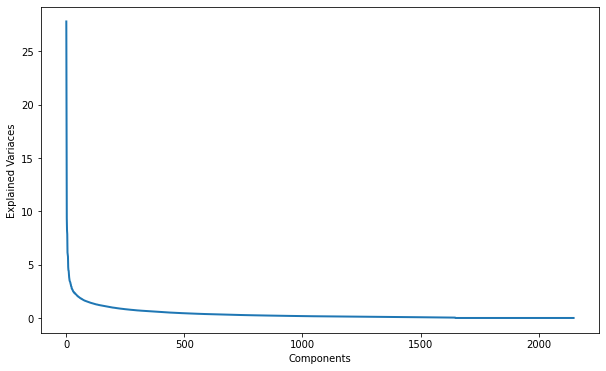

Recomended value for n_component is 447


In [5]:
pca = PCA_Transformation()
pca.findOptimumComponent(X)

In [6]:
pca.fit(X_train, n_component=500)
X_train, X_test = pca.transformData(X_train, X_test)

## Training Results

In [7]:
pca.classifyAndEvaluate(X_train, X_test, y_train, y_test)

Model Name:  SVC
Model Accuracy:  0.928
Model Precision:  0.8548387096774194
Model f_score:  0.9217391304347826
Model Recall Score:  1.0


Model Name:  NaiveBayes
Model Accuracy:  0.718
Model Precision:  0.5967741935483871
Model f_score:  0.677345537757437
Model Recall Score:  0.783068783068783


Model Name:  KNN
Model Accuracy:  0.634
Model Precision:  0.2661290322580645
Model f_score:  0.41904761904761906
Model Recall Score:  0.9850746268656716


Model Name:  Decision Tree
Model Accuracy:  1.0
Model Precision:  1.0
Model f_score:  1.0
Model Recall Score:  1.0


Model Name:  Logistic Regression
Model Accuracy:  0.814
Model Precision:  0.782258064516129
Model f_score:  0.8066528066528066
Model Recall Score:  0.8326180257510729


Model Name:  Linear Discriminant Analysis
Model Accuracy:  0.798
Model Precision:  0.7016129032258065
Model f_score:  0.7750556792873052
Model Recall Score:  0.8656716417910447




***

# CNN Based Classification

## Importing Data

In [8]:
X_train, y_train = loadData(directory='train', toType='tensor')
X_test, y_test = loadData(directory='test', toType='tensor')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)

torch.Size([1649, 1, 224, 224]) torch.Size([1649])
torch.Size([500, 1, 224, 224]) torch.Size([1649])


## Reshaping Data

In [9]:
X = torch.cat((X_train, X_test))
y = torch.cat((y_train, y_test))

print(X.shape, y.shape)

torch.Size([2149, 1, 224, 224]) torch.Size([2149])


## Batchloader

In [10]:
def getBatch(index, batch_size, maxlen):
    if (index+1)*batch_size > maxlen:
        return X[index*batch_size:], y[index*batch_size:]
    else:
        return X[index*batch_size:(index+1)*batch_size], y[index*batch_size:(index+1)*batch_size]

## Training Loop

In [11]:
num_epoch = 10
batch_size = 50
dataset_len = X.shape[0]

network = CNN_Classifier()
optimizer = optim.Adam(network.parameters(), lr=0.005)

losses = []
correct = []

for epoch in range(num_epoch):
    total_loss = 0
    total_correct = 0
    for index in range(dataset_len//batch_size+1):
        images, labels = getBatch(index, batch_size, dataset_len)
        preds = network(images)
        loss = f.cross_entropy(preds, labels.to(torch.int64))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += network.get_num_correct(labels, preds)

    losses.append(total_loss)
    correct.append(total_correct)
    print('epoch: {}, total_loss: {:.2f}, total_correct: {}'.format(epoch+1, total_loss, total_correct))

epoch: 1, total_loss: 24.49, total_correct: 1425
epoch: 2, total_loss: 10.31, total_correct: 1979
epoch: 3, total_loss: 8.05, total_correct: 2006
epoch: 4, total_loss: 9.91, total_correct: 1900
epoch: 5, total_loss: 7.99, total_correct: 2015
epoch: 6, total_loss: 5.87, total_correct: 2054
epoch: 7, total_loss: 5.52, total_correct: 2051
epoch: 8, total_loss: 4.68, total_correct: 2061
epoch: 9, total_loss: 4.64, total_correct: 2072
epoch: 10, total_loss: 4.94, total_correct: 2062


## Training Results

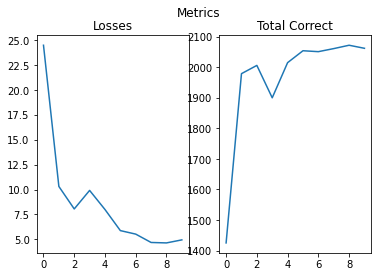

In [12]:
network.graph(losses, correct)